In [3]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use('dark_background')


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [4]:
df = pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv",  delimiter=',')

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.shape

(2938, 22)

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [11]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [12]:
df.isnull().sum()


Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [13]:
#Missing Values 
df.isnull().sum()*100/df.isnull().count()


Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [14]:
#df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype in [np.float64, np.int64] else x)


In [15]:
country_list = df.Country.unique()
list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [16]:
# Null values  interpolation.
for country in country_list:
    df.loc[df['Country'] == country,list] = df.loc[df['Country'] == country,list].interpolate()
    
#Drop remaining null values after interpolation.
df.dropna(inplace=True)

In [17]:
df.isnull().sum()*100/df.isnull().count()


Country                     0.0
Year                        0.0
Status                      0.0
Life_Expectancy             0.0
Adult_Mortality             0.0
Infant_Deaths               0.0
Alcohol                     0.0
Percentage_Exp              0.0
HepatitisB                  0.0
Measles                     0.0
BMI                         0.0
Under_Five_Deaths           0.0
Polio                       0.0
Tot_Exp                     0.0
Diphtheria                  0.0
HIV/AIDS                    0.0
GDP                         0.0
Population                  0.0
thinness_1to19_years        0.0
thinness_5to9_years         0.0
Income_Comp_Of_Resources    0.0
Schooling                   0.0
dtype: float64

In [18]:

df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
correlation_matrix


,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,1.000000,0.171485,-0.072108,-0.037601,-0.046859,0.089096,0.247259,-0.099554,0.096059,-0.042479,0.117642,0.074139,0.166006,-0.142581,0.119355,0.022775,-0.047477,-0.053483,0.242900,0.225046
Life_Expectancy,0.171485,1.000000,-0.660529,-0.160922,0.392617,0.413683,0.249625,-0.138133,0.599572,-0.187438,0.415188,0.199288,0.442943,-0.576373,0.443612,-0.010840,-0.458724,-0.450095,0.726753,0.744703
Adult_Mortality,-0.072108,-0.660529,1.000000,0.038304,-0.181469,-0.242438,-0.103382,-0.007269,-0.372519,0.052865,-0.208006,-0.096727,-0.210136,0.536273,-0.256955,-0.022403,0.278842,0.284581,-0.411010,-0.404160
Infant_Deaths,-0.037601,-0.160922,0.038304,1.000000,-0.104406,-0.089772,-0.216949,0.509747,-0.227769,0.996729,-0.152153,-0.147961,-0.156470,0.001739,-0.097720,0.562805,0.481580,0.487596,-0.137175,-0.195815
Alcohol,-0.046859,0.392617,-0.181469,-0.104406,1.000000,0.430835,0.106383,-0.029252,0.379327,-0.099713,0.239854,0.227108,0.245454,-0.033756,0.458112,-0.025556,-0.398731,-0.387087,0.532173,0.590261
Percentage_Exp,0.089096,0.413683,-0.242438,-0.089772,0.430835,1.000000,-0.011530,-0.069316,0.277788,-0.092480,0.162606,0.217103,0.168910,-0.109680,0.963177,-0.016607,-0.268347,-0.268131,0.408174,0.426801
HepatitisB,0.247259,0.249625,-0.103382,-0.216949,0.106383,-0.011530,1.000000,-0.142059,0.198627,-0.226512,0.451299,0.130435,0.552732,-0.104034,0.009077,-0.092418,-0.166903,-0.181161,0.239386,0.268951
Measles,-0.099554,-0.138133,-0.007269,0.509747,-0.029252,-0.069316,-0.142059,1.000000,-0.168172,0.519173,-0.113574,-0.111638,-0.119828,0.019600,-0.073858,0.269840,0.227961,0.223325,-0.137648,-0.146625
BMI,0.096059,0.599572,-0.372519,-0.227769,0.379327,0.277788,0.198627,-0.168172,1.000000,-0.238155,0.264753,0.233643,0.266601,-0.239171,0.300517,-0.071306,-0.560982,-0.567943,0.539862,0.584998
Under_Five_Deaths,-0.042479,-0.187438,0.052865,0.996729,-0.099713,-0.092480,-0.226512,0.519173,-0.238155,1.000000,-0.169989,-0.148325,-0.177302,0.013390,-0.101404,0.548761,0.483954,0.488759,-0.157039,-0.212678


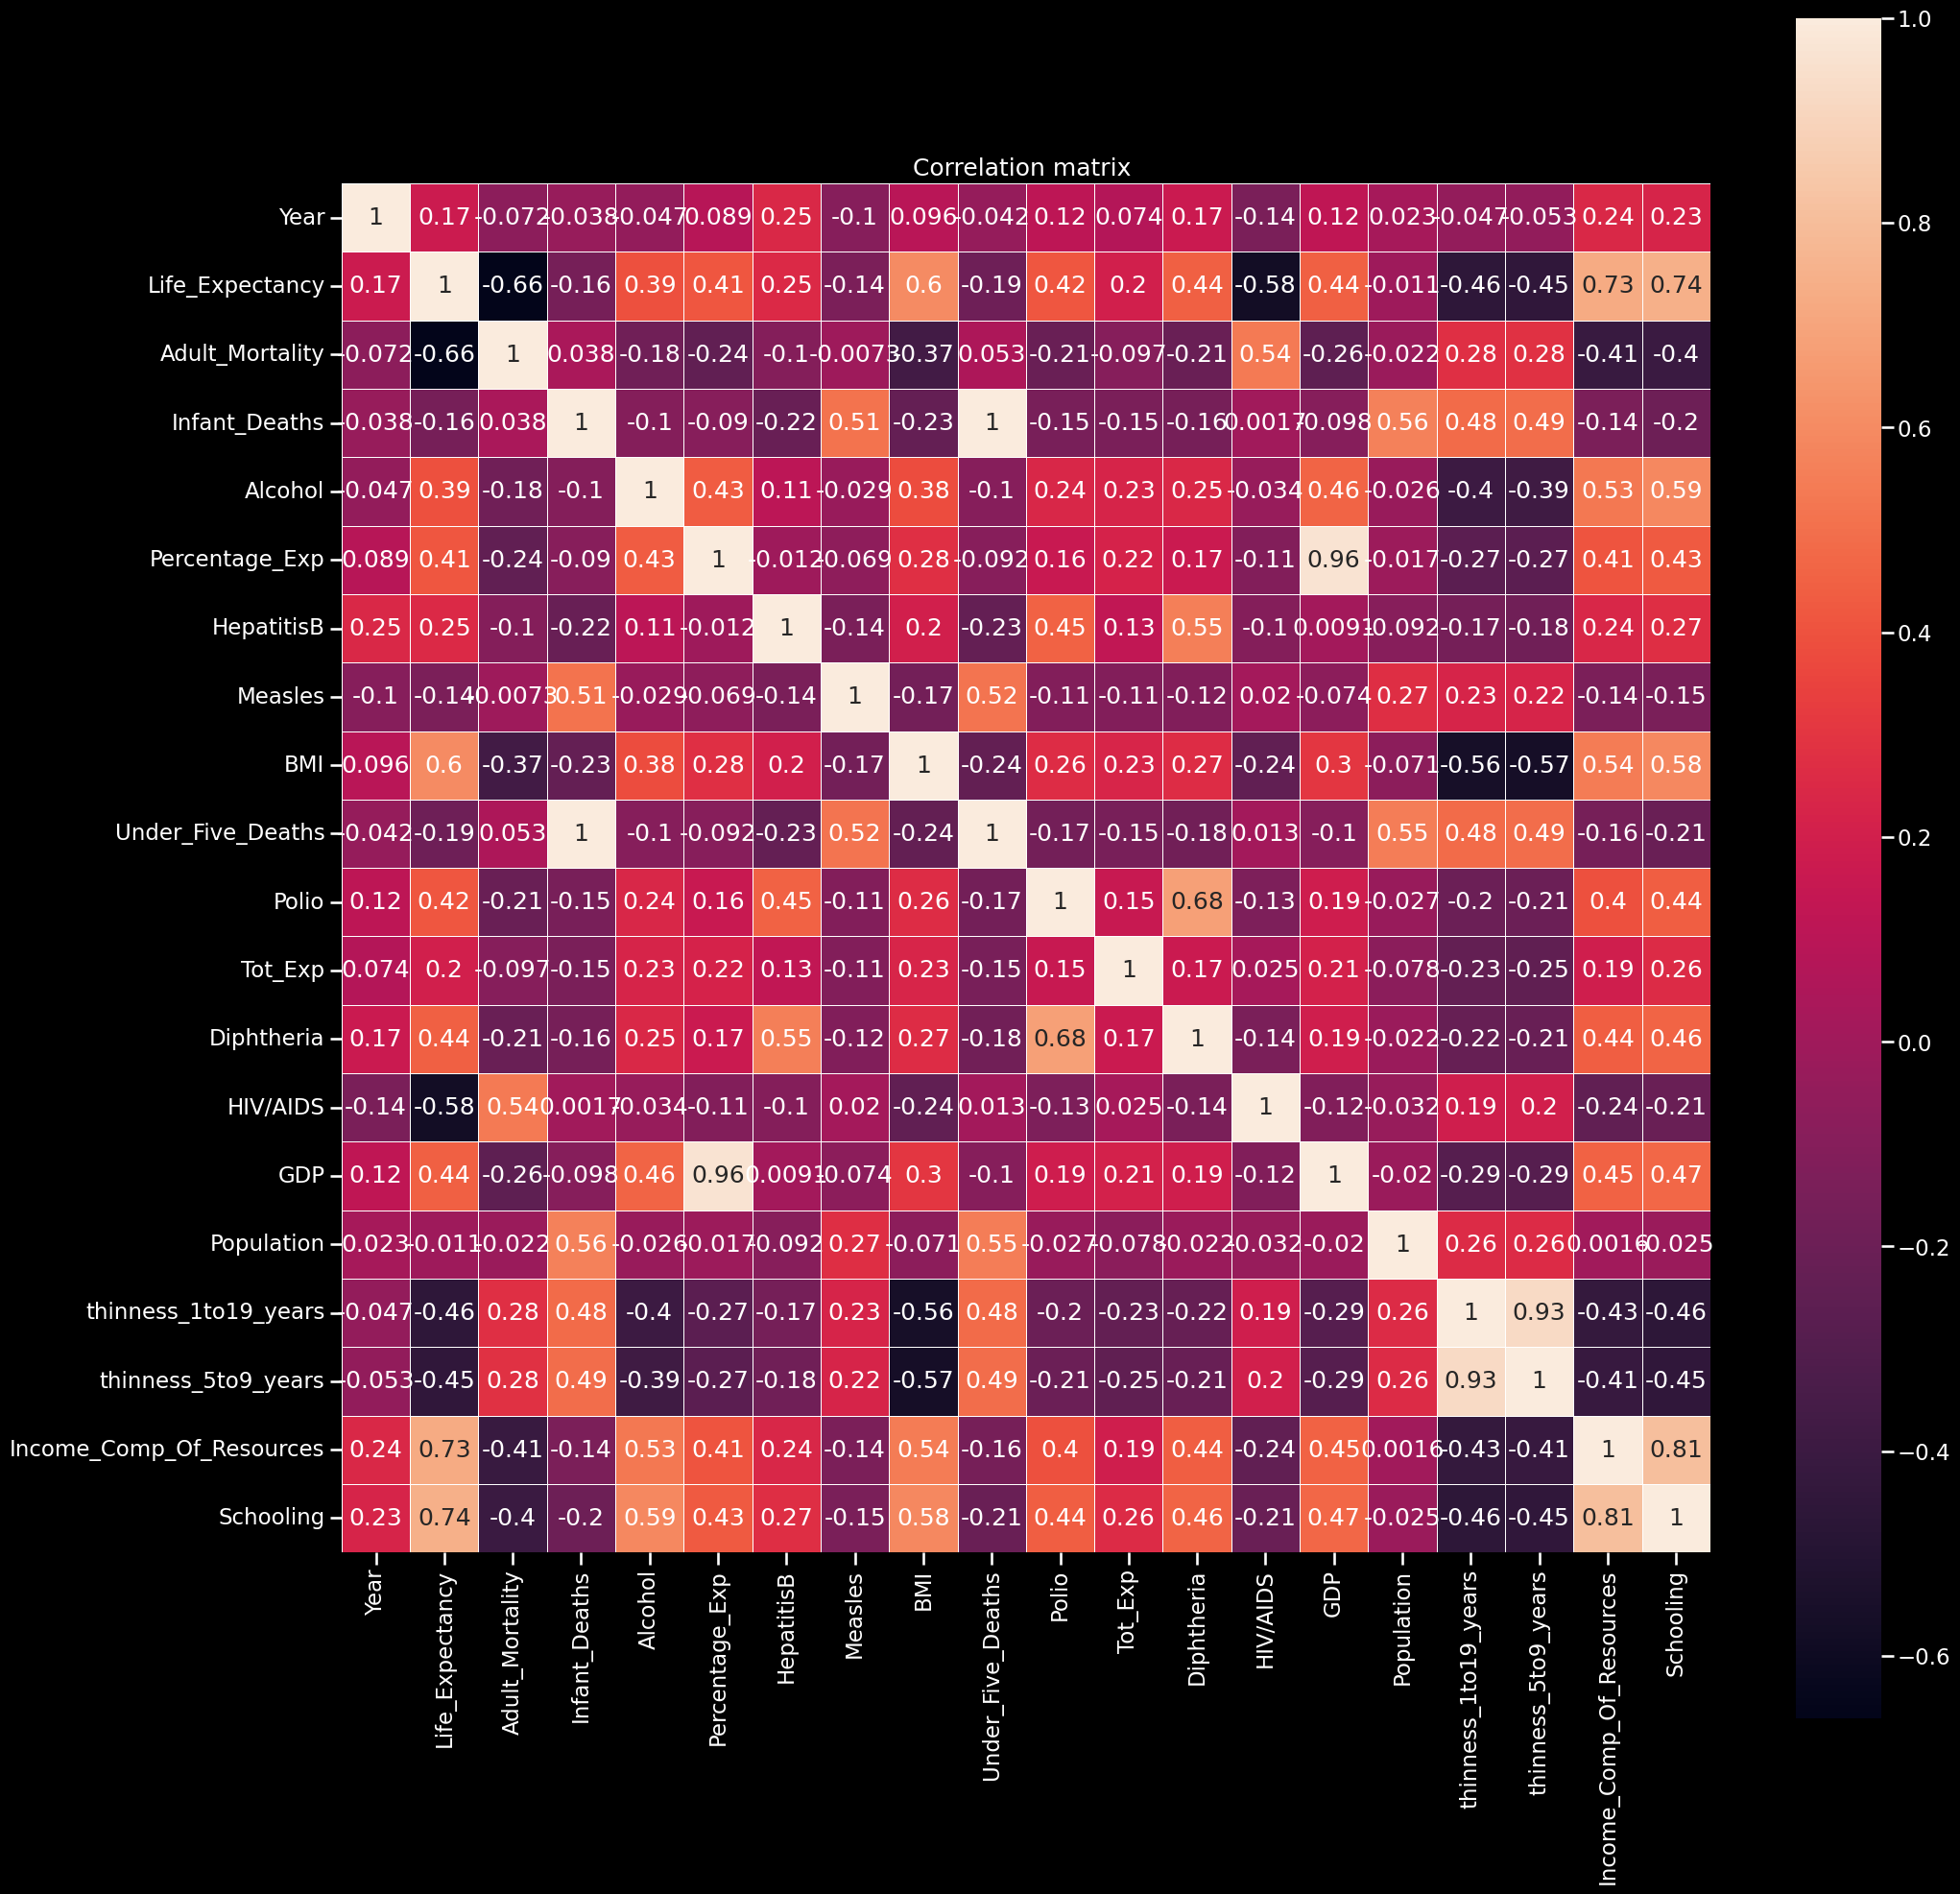

In [20]:
plt.figure(figsize=(23,23))
sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=.7,)
plt.title("Correlation matrix ")
plt.show()

<Axes: xlabel='Life_Expectancy', ylabel='BMI'>

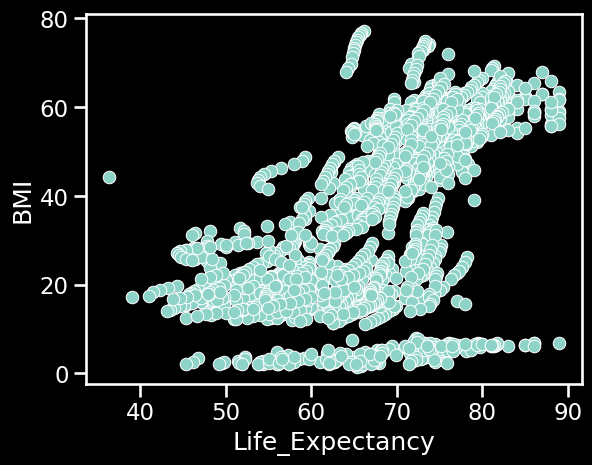

In [21]:
sns.scatterplot(x=df['Life_Expectancy'],y=df['BMI'])

<Axes: xlabel='Life_Expectancy', ylabel='Schooling'>

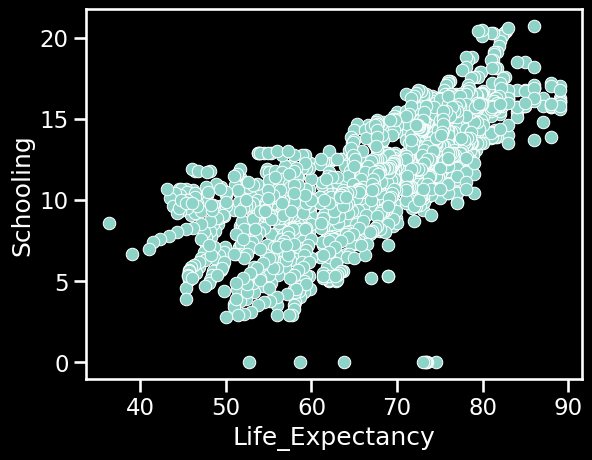

In [22]:
sns.scatterplot(x=df['Life_Expectancy'],y=df['Schooling'])

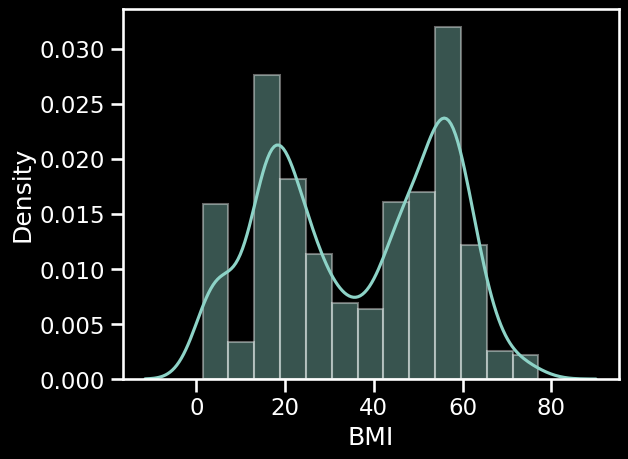

In [23]:
sns.distplot(df['BMI']);

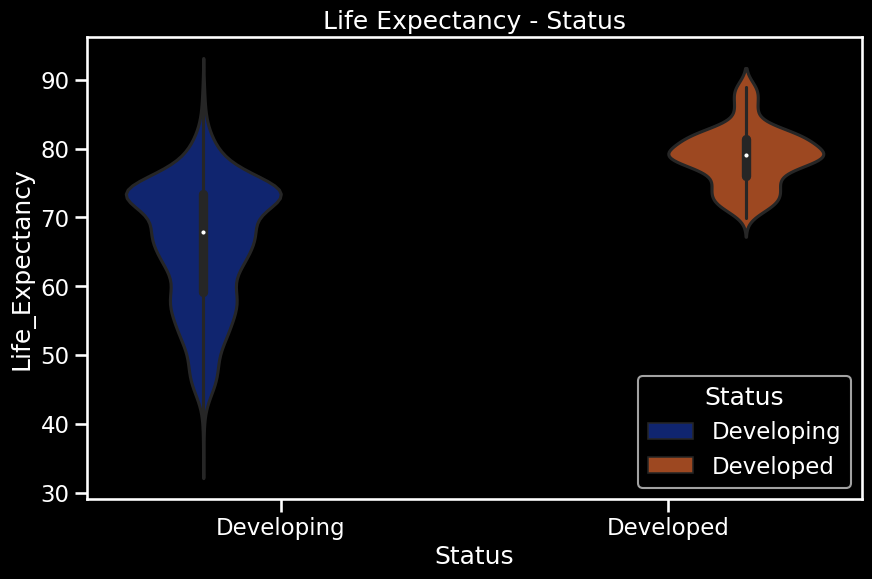

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='Life_Expectancy', data=df, hue='Status', inner='box', palette='dark')
plt.title('Life Expectancy - Status')
plt.show()

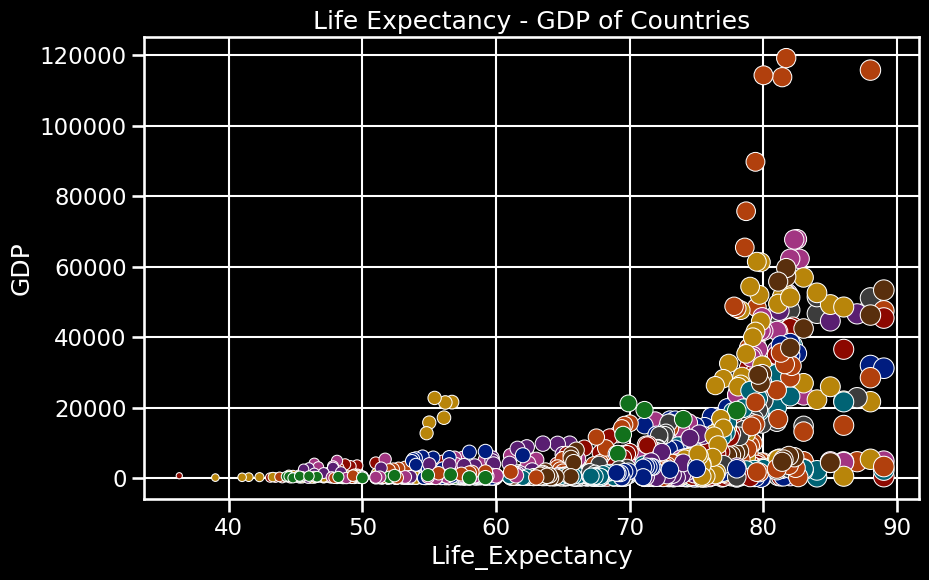

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x='Life_Expectancy',
    y='GDP',
    data=df,
    hue='Country',
    size='Life_Expectancy',
    sizes=(20, 220), 
    palette='dark',
)

plt.title('Life Expectancy - GDP of Countries')
plt.grid(True)

ax.legend().set_visible(False)
plt.show()

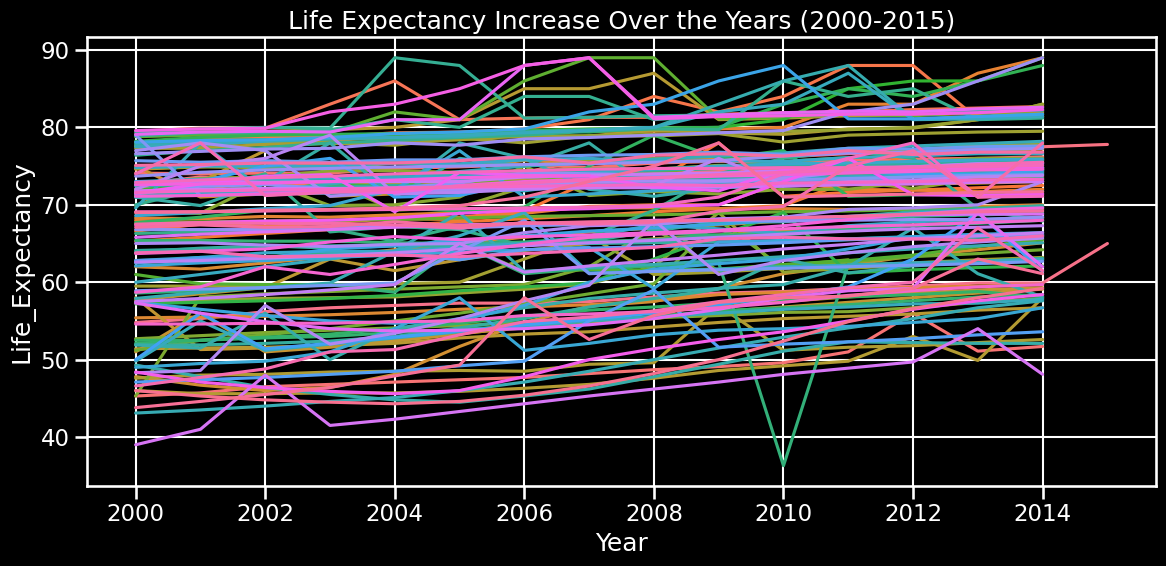

In [26]:
plt.figure(figsize=(12, 6))

years_data = range(2000, 2016)
filtered = df[df['Year'].isin(years_data)]

sns.lineplot(x='Year', y='Life_Expectancy', hue='Country', data=filtered)

plt.title('Life Expectancy Increase Over the Years (2000-2015)')
plt.grid(True)

plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life_Expectancy'}>,
        <Axes: title={'center': 'Adult_Mortality'}>,
        <Axes: title={'center': 'Infant_Deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Percentage_Exp'}>,
        <Axes: title={'center': 'HepatitisB'}>,
        <Axes: title={'center': 'Measles'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Under_Five_Deaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Tot_Exp'}>],
       [<Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'thinness_1to19_years'}>,
        <Axes: title={'center': 'thinness_5to9_years'}>,
        <Axes: title={'center': 'Income_Comp_Of_Resources'}>,
        <Axes: title={'center': 'Schooling'}>]], dtype=object)

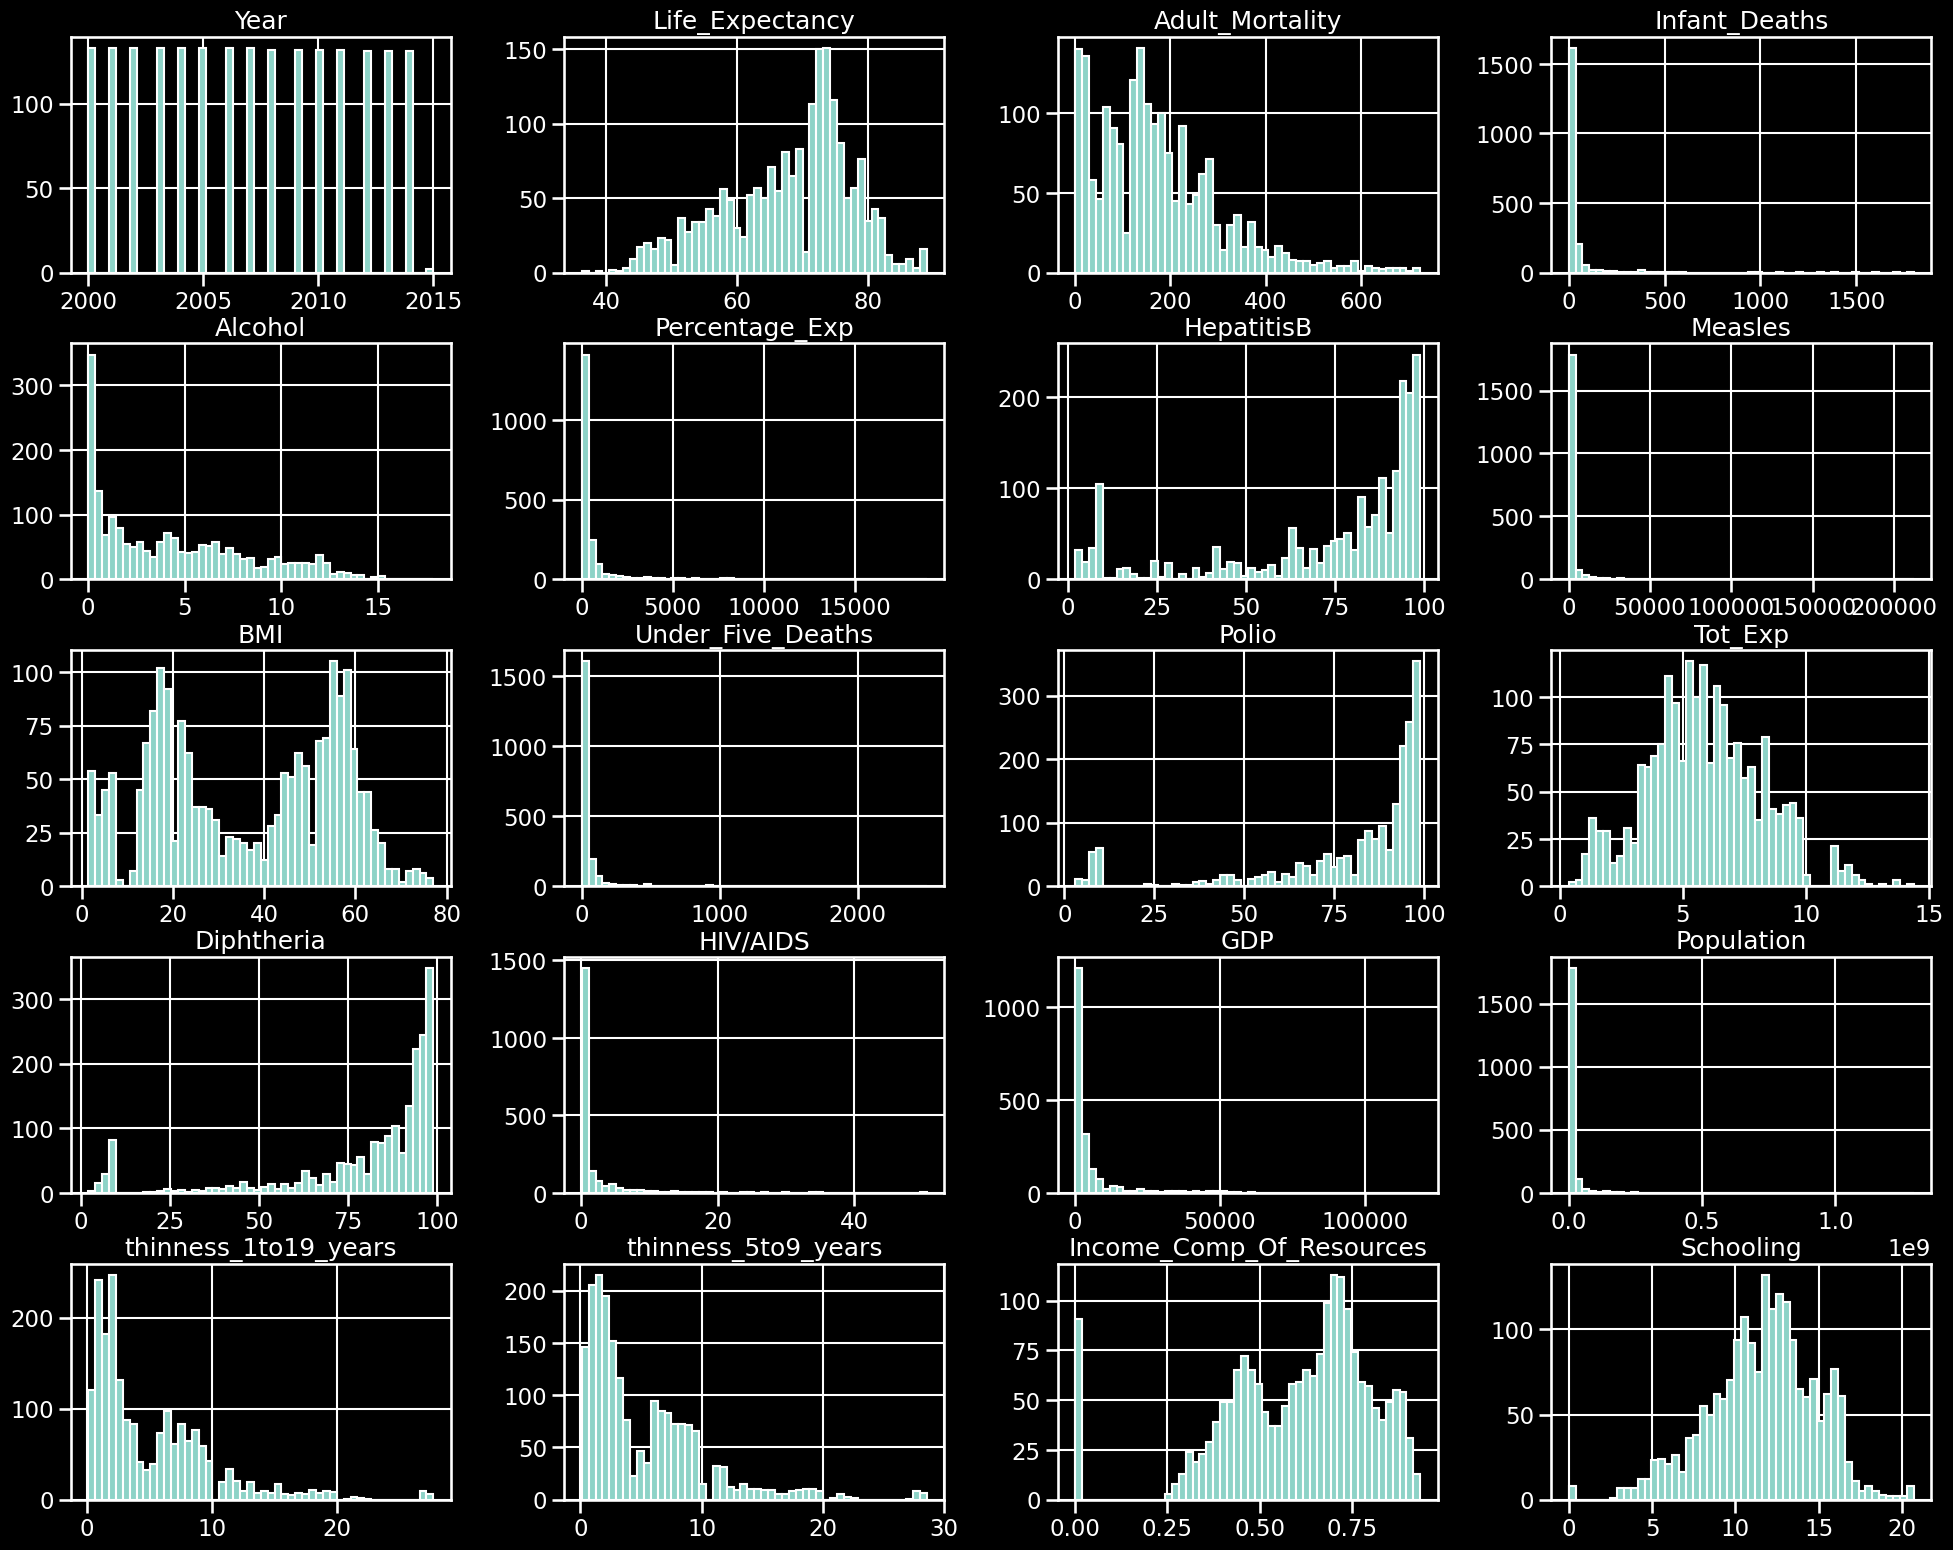

In [27]:
df.hist(bins=50, figsize=(24, 19))

In [28]:
# Linear Regression

Coefficients: [2.23754857]
Intercept: 41.94019742166297
Mean Squared Error: 43.51440457709359
R-squared: 0.5499147127254285


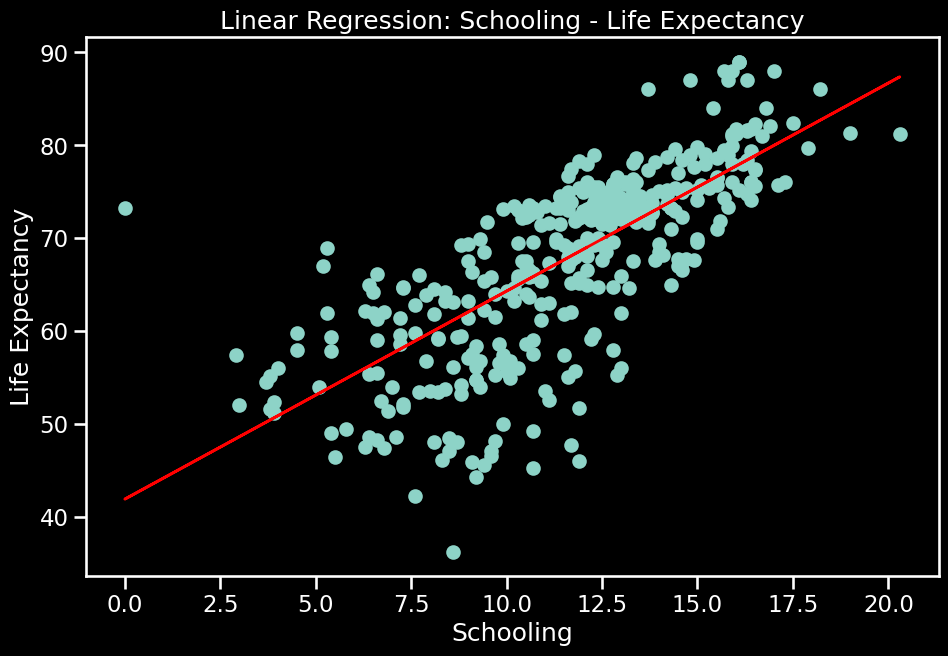

In [29]:
X = df[['Schooling']]
y = df['Life_Expectancy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(11, 7))
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: Schooling - Life Expectancy')
plt.show()


Coefficients: [0.29247645]
Intercept: 57.42452632979348
Mean Squared Error: 60.79065792959938
R-squared: 0.3712201510334573


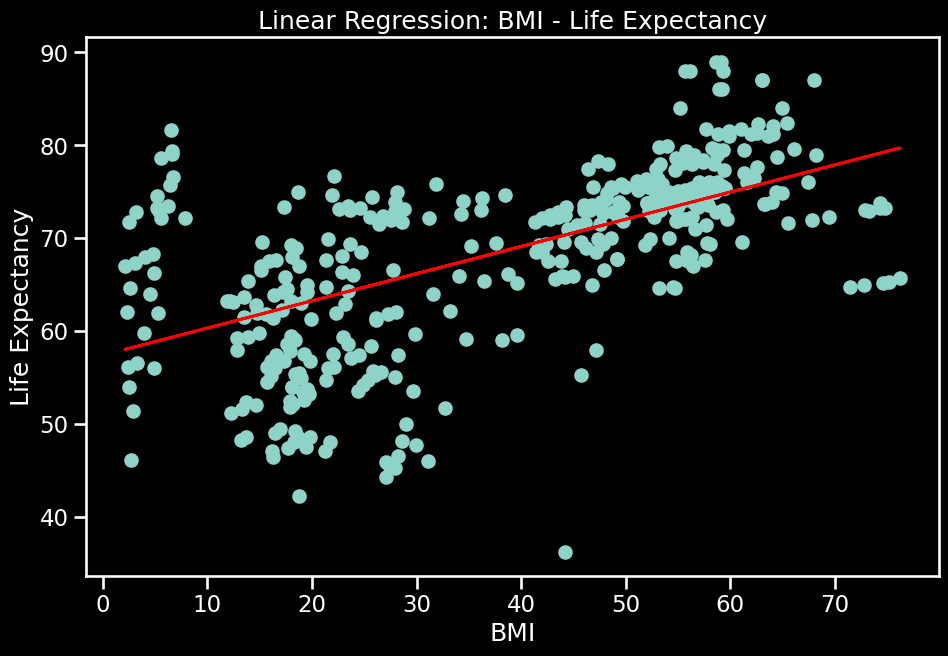

In [30]:
X = df[['BMI']]
y = df['Life_Expectancy']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(11, 7))
plt.scatter(X_test, y_test,)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Linear Regression: BMI - Life Expectancy')
plt.show()

In [31]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [32]:
# Multiple Linear Regression

In [33]:
X = df[['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 
        'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS', 
        'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling']]
y = df['Life_Expectancy']

# Spliting data - training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train  model
model = LinearRegression()
model.fit(X_train, y_train)

#  predictions are made on  test set
y_pred = model.predict(X_test)

# Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# coefficients and model performance
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Coefficients: [-1.38963995e-02  8.61101843e-02 -1.01916525e-01  2.95258503e-04
 -2.32281526e-03 -6.10169642e-06  5.86430820e-02 -6.37448393e-02
  1.13315652e-02  6.81071819e-02  2.21950497e-02 -4.86800639e-01
  2.54341111e-05 -8.30397767e-10 -5.86864841e-02  6.43663478e-03
  8.59973838e+00  9.04801526e-01]
Intercept: 51.24858538638784
Mean Squared Error: 15.526663537334864
R-squared: 0.8394020810686744


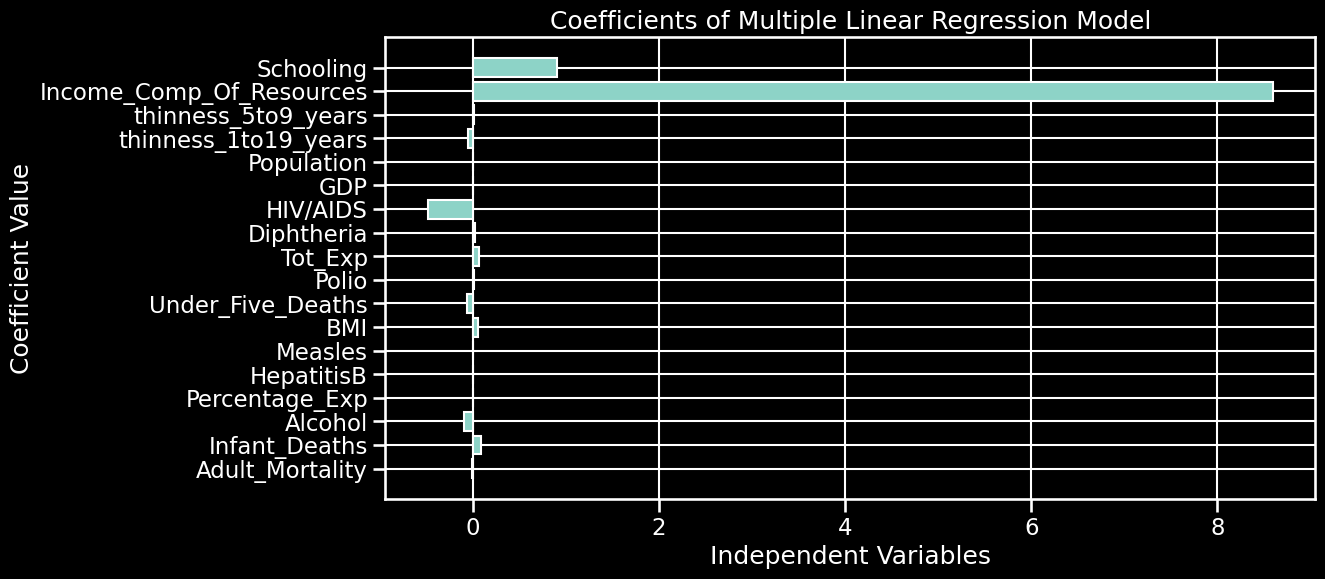

In [34]:
plt.figure(figsize=(12, 6))
plt.barh(X.columns, model.coef_)
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of Multiple Linear Regression Model')
plt.grid(True)

In [35]:
# Regression Trees

Mean Squared Error: 8.559547738693468
R-squared: 0.9114654896383837


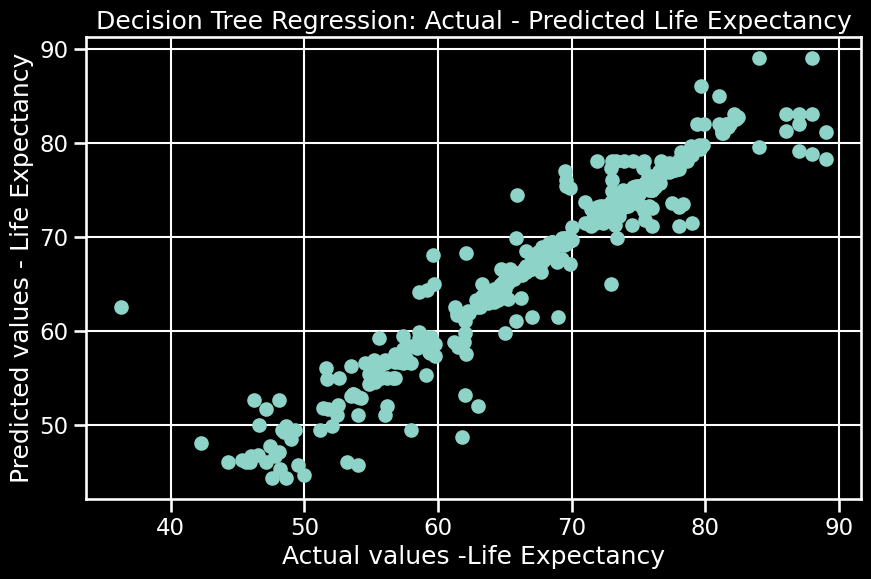

In [36]:

from sklearn.tree import DecisionTreeRegressor


# Select the independent variables (X) and the dependent variable (y)
X = df[['Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 
        'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria', 'HIV/AIDS', 
        'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling']]
y = df['Life_Expectancy']

# Splitting data - training - testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#  predictions on  test set are made
y_pred = model.predict(X_test)

# model performance 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values -Life Expectancy')
plt.ylabel('Predicted values - Life Expectancy')
plt.title('Decision Tree Regression: Actual - Predicted Life Expectancy')
plt.grid(True)



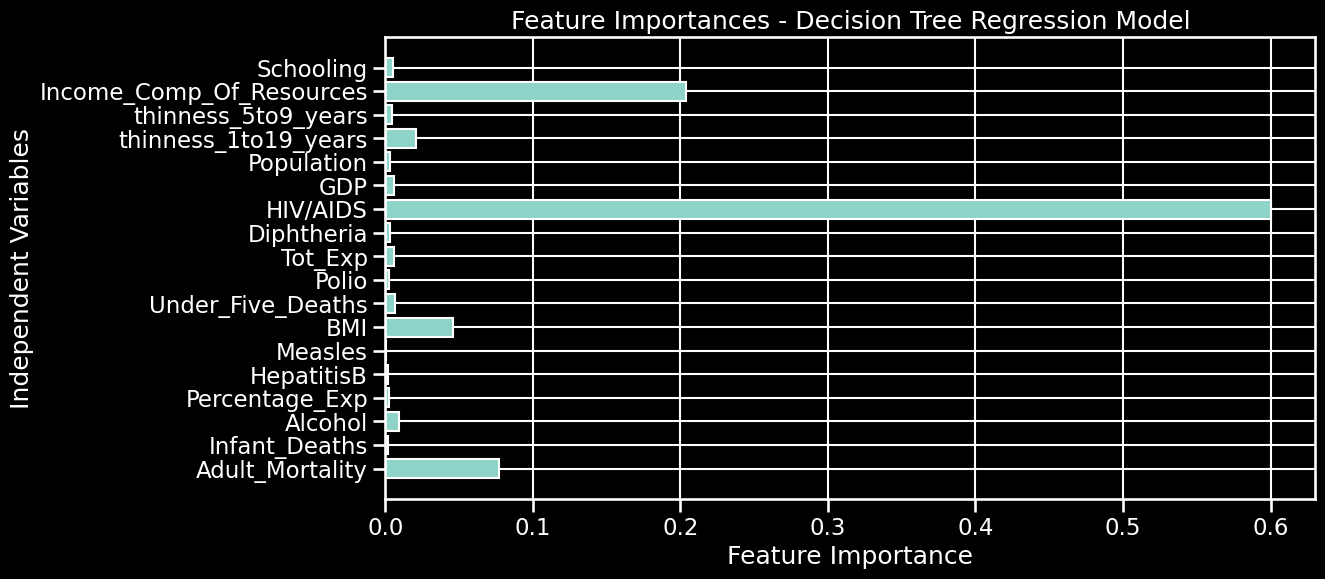

In [37]:
feature_importances = model.feature_importances_

#  independent variables = X columns
independent_variables = X.columns

plt.figure(figsize=(12, 6))
plt.barh(independent_variables, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Independent Variables')
plt.title('Feature Importances - Decision Tree Regression Model')
plt.grid(True)

plt.show()